# Importar a tabela com as features e rótulos

### **Importante**: para rodar esse notebook, é necessário baixar o arquivo de 'features.csv' gerado pelo notebook de feature engineering (https://colab.research.google.com/drive/1gcgucA_kH5xj9dncwh1sUfaLRROkbm3G). Salve esse documento na raiz do seu Drive e rode esse notebook a seguir.

In [2]:
import pandas as pd

df_infos = pd.read_csv('/content/drive/MyDrive/features.csv')
df_infos.head()

,Unnamed: 0,ID,IS_CHURN,LEVEL_NAME,AUTO_ACCEPT,ACCEPTANCE_RATE,ORDERS_DONE,ORDERS_LAST_30D_COUNT,ORDERS_CANCEL,ORDERS_CANCELED_LAST_30D_COUNT,...,PRODUCT_RETURNS,SUPPORT_TICKET_COUNT,DEFECTS_COUNT,AVG_DISTANCE_TO_USER,TRANSPORT_bicycle,TRANSPORT_car,TRANSPORT_motorbike,TRANSPORT_neither,TRANSPORT_cargo_van,TRANSPORT_motorbike_trailer
0,0,1552668,False,1,True,1.0000,0,4,1,0,...,0.0,0,2,3.765437,0,0,1,0,0,0
1,1,1552649,False,3,True,0.7780,4,122,1,2,...,0.0,0,8,4.014581,0,0,1,0,0,0
2,2,1552604,False,2,True,1.0000,3,57,0,1,...,0.0,0,9,1.517087,1,0,0,0,0,0
3,3,1552588,False,4,True,0.0000,1,59,0,2,...,0.0,0,7,2.256725,0,1,0,0,0,0
4,4,1552553,False,1,True,0.8887,3,9,0,0,...,0.0,0,5,2.736529,0,1,0,0,0,0


In [5]:
df_infos.groupby('IS_CHURN')['SUPPORT_TICKET_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
IS_CHURN,,,,,,,,
False,31133.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
True,132160.0,12.544597,31.301608,0.0,0.0,2.0,12.0,1184.0


# Separar as features dos rótulos e os subsets de 'treino' dos de 'teste'

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo x e y
x = df_infos[[
              'LEVEL_NAME', 
              'AUTO_ACCEPT', 'ACCEPTANCE_RATE', 
              'ORDERS_DONE', 'ORDERS_LAST_30D_COUNT',
              'ORDERS_CANCEL', 'ORDERS_CANCELED_LAST_30D_COUNT', 
              'FIRST_ORDER_DATE', 'LAST_ORDER_DATE',
              'EARNINGS', 'TIPS', 
              'PUNISHMENT_MINUTES', 'PRODUCT_RETURNS', 
              'SUPPORT_TICKET_COUNT', 'DEFECTS_COUNT', 
              'AVG_DISTANCE_TO_USER', 
              'TRANSPORT_bicycle','TRANSPORT_car', 'TRANSPORT_motorbike', 'TRANSPORT_neither', 'TRANSPORT_cargo_van', 'TRANSPORT_motorbike_trailer',
            ]]
y = df_infos[['IS_CHURN']]

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Treinar o modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Normalizar os dados
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
scaler.fit(x_train)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Criando o modelo
model = LogisticRegression()
model.fit(x_train, y_train)

# Predizendo
y_pred = model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature: LEVEL_NAME, Score: 0.05326
Feature: AUTO_ACCEPT, Score: 0.06191
Feature: ACCEPTANCE_RATE, Score: 0.12545
Feature: ORDERS_DONE, Score: -0.06278
Feature: ORDERS_LAST_30D_COUNT, Score: -2.50861
Feature: ORDERS_CANCEL, Score: 0.07066
Feature: ORDERS_CANCELED_LAST_30D_COUNT, Score: -0.13663
Feature: FIRST_ORDER_DATE, Score: -0.02853
Feature: LAST_ORDER_DATE, Score: -12.97138
Feature: EARNINGS, Score: 0.22665
Feature: TIPS, Score: 0.48481
Feature: PUNISHMENT_MINUTES, Score: 0.25026
Feature: PRODUCT_RETURNS, Score: 0.04352
Feature: SUPPORT_TICKET_COUNT, Score: 21.75265
Feature: DEFECTS_COUNT, Score: -0.72360
Feature: AVG_DISTANCE_TO_USER, Score: 0.02992
Feature: TRANSPORT_bicycle, Score: 0.01427
Feature: TRANSPORT_car, Score: -0.02671
Feature: TRANSPORT_motorbike, Score: 0.00896
Feature: TRANSPORT_neither, Score: -0.11032
Feature: TRANSPORT_cargo_van, Score: 0.00927
Feature: TRANSPORT_motorbike_trailer, Score: 0.00000


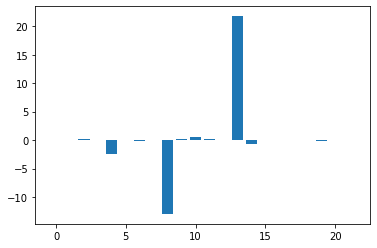

In [ ]:
import matplotlib.pyplot as plt

# Avaliar a importância das features
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (df_infos.columns.values[i + 3],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Avaliar o modelo

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9822201355433984

In [ ]:
mean_squared_error(y_test, y_pred)

0.017779864456601617

In [ ]:
mean_absolute_error(y_test, y_pred)

0.017779864456601617

In [ ]:
r2_score(y_test, y_pred)

0.8836003255449862